# Diabetes prediction with Logistic Regression

In [51]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale,StandardScaler # for standardization
from sklearn.model_selection import train_test_split, GridSearchCV ,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score, mean_squared_error, r2_score,classification_report,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression

In [ ]:
# turn off alerts
from warnings import filterwarnings
filterwarnings ('ignore')

# Dataset and Story

Purpose: There is some information about the people in the data set kept in our hospital. We are asked to perform a estimation model about whether the person has diabetes according to the results of the analysis.

In [8]:
df= pd.read_csv("diabetes.csv")

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Model and Prediction

In [54]:
df["Outcome"].value_counts() # representation of the dependent variable.

0    500
1    268
Name: Outcome, dtype: int64

Veride 1 yani şeker hastası sayısında 268 adet kişinin bilgileri, 0 yani şeker hastası olmayan kişilerin verilerinden ise 500 kişinin bilgileri bulunmaktadır.

In [10]:
df.describe().T # descriptive statistics

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [56]:
y=df["Outcome"]# get dependent variable

In [55]:
X=df.drop(["Outcome"], axis=1) # getting arguments

In [15]:
loj_model=LogisticRegression(solver ="liblinear").fit(X,y)# model installed


In [58]:
loj_model.intercept_ # fixed value of the model

array([-5.77106375])

In [17]:
loj_model.coef_ # coefficients of arguments

array([[ 1.17078005e-01,  2.83845069e-02, -1.68917706e-02,
         7.50342954e-04, -6.42960979e-04,  5.97506497e-02,
         6.79600672e-01,  7.23046162e-03]])

In [18]:
loj_model.predict(x)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [19]:
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [57]:
y_pred = loj_model.predict(X) # predictive acquisition values

In [21]:
confusion_matrix(y,y_pred) # confusion matrix

array([[448,  52],
       [120, 148]], dtype=int64)

In [24]:
accuracy_score(y,y_pred) # success rate

0.7760416666666666

In [29]:
print(classification_report(y,y_pred)) #detaylı raporlaması

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.78       768
   macro avg       0.76      0.72      0.74       768
weighted avg       0.77      0.78      0.77       768



In [31]:
loj_model.predict_proba(X)[0:10] # gives the probability of classes.

array([[0.35038651, 0.64961349],
       [0.91702747, 0.08297253],
       [0.22463994, 0.77536006],
       [0.92141686, 0.07858314],
       [0.16677024, 0.83322976],
       [0.79902495, 0.20097505],
       [0.88021554, 0.11978446],
       [0.27816086, 0.72183914],
       [0.32087353, 0.67912647],
       [0.92273876, 0.07726124]])

### ROC 

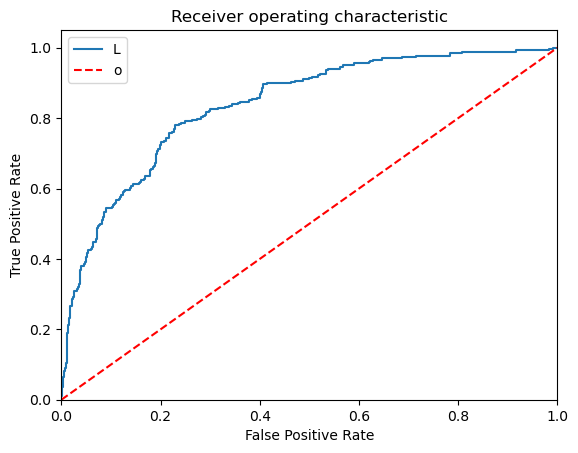

In [40]:
logit_roc_auc = roc_auc_score(y,loj_model.predict(X)) # grafik 
fpr,tpr,theresholds= roc_curve(y,loj_model.predict_proba(X)[:,1])#eğri
plt.figure() 
plt.plot(fpr,tpr,label='AUC (area= %0.2f)'  % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')# eksen
plt.xlim([0.0,1.0])#eksen
plt.ylim([0.0,1.05])#eksen
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.legend ('Log_ROC')
plt.show()

Comment: A graph that plots False-Positive rejection vs. True-Positive rejects to predict model success

# Model Tuning

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,# independent variable
                                                y,#the dependent variable
                                                test_size=0.30,# test data
                                                random_state=42) 

In [43]:
loj_model = LogisticRegression(solver= "liblinear").fit(X_train,y_train)

In [46]:
y_pred= loj_model.predict(X_test)

In [47]:
print(accuracy_score(y_test,y_pred))

0.7532467532467533


In [53]:
cross_val_score(loj_model,X_test,y_test, cv=10).mean()

0.7661231884057971